In [2]:
import numpy as np

import matplotlib.pyplot as plt
% matplotlib  inline

### Exercício # 1

Dada uma lista `a = [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]` use o que você aprendeu até agora (lista e loop) para criar uma lista apenas com os elementos pares (Dica, para criar uma lista vazia basta defini-la como `x = []`)

In [2]:
a = [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
b = []

for x in a:
     if x % 2 == 0:
        b.append(x)

print b

[4, 16, 36, 64, 100]


Também pode ser feito de uma forma mais "pythonesca"

In [3]:
a = [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
b = [x for x in a if x % 2 == 0]

print b

[4, 16, 36, 64, 100]


## Exercício 2

Dados três valores escreva uma função `max_of_three` que retorna o maior valor dos três.

In [1]:
def max_of_three(a, b, c):
    max_val = 0
    if a > b:
        if a > c:
            max_val = a
        else:
            max_val = c
    else:
        if b > c:
            max_val = b
        else:
            max_val = c

    return max_val

print max_of_three(3, 4, 1)

4


Outra solução:

In [2]:
def max_of_three(a, b, c):
    if (a > b) and (a > c):
        max_val = a
    elif (b > a) and (b > c):
        max_val = b
    elif (c > a) and (c > b):
        max_val = c
    
    return max_val

print max_of_three(3, 4, 1)

4


Ou mais simples ainda ...

In [3]:
max(3, 4, 1)

4

## Exercício 3

Faça uma classe `ConvertTemp` que dado um valor de temperatura ele pode ser convertido entre os três sistema de medidas (Farenheit, Kelvins e Celsius).

Lembre-se que:

$T_{C} = (T_{F} - 32.) \times 5/9$

$T_{F} = (T_{C} \times 5/9) + 32$

$T_{C} = T_{K} - 273.15$

In [9]:
class ConvertTemp:
    
    def __init__(self, temp):
        self.temp = temp
        
    def celsius_to_kelvins(self):
        return self.temp + 273.15

    def celsius_to_farenheit(self):
        return (self.temp * 9. / 5.) + 32.
    
    def kelvin_to_celsius(self):
        return self.temp - 273.15
    
    def kelvin_to_farenheit(self):
        return (self.kelvin_to_celsius() * 9. / 5.) + 32.
    
    def farenheit_to_celsius(self):
        return (self.temp - 32) * 5. / 9.
    
    def farenheit_to_kelvin(self):
        return (self.temp - 32) * 5. / 9. + 273.15 
    
t = ConvertTemp(23.5)
print 'Temperatura em Kelvins: ', t.celsius_to_kelvins()

t = ConvertTemp(296.15)
print 'Temperatura em Celsius: ', t.kelvin_to_celsius()

t = ConvertTemp(79.)
print 'Temperature in Celsius: ', t.farenheit_to_celsius()

Temperatura em Kelvins:  296.65
Temperatura em Celsius:  23.0
Temperature in Celsius:  26.1111111111


## Exercício 4

a) Refaça o Exercício 1 definindo `a` como um objeto numpy.array e selecionando os valores pares com o que você aprendeu.

b) Utilize a técnica de mínimos quadrados, em forma matricial, para verficar os parâmetros `a` e `b` de uma regressão linear. Compare os valores obtidos com esse método com os valores reais.

Considerações:
- Considere que:
$X = 
\begin{bmatrix}
1 & 1 \\
1 & 2 \\
1 & 3 \\
\vdots & \vdots \\
1 & n \\
\end{bmatrix}$
Com $n$ indo de 1 a 100

- Considere que $y = X \beta + \mu$, onde $\beta = \begin{bmatrix} a \\ b \end{bmatrix} = \begin{bmatrix} 3 \\ 0.5 \end{bmatrix}$ e $\mu \sim N(0,1)$ é um ruído com distribuição normal de média zero e desvio padrão igual a 1

- Utilize a seguinte equação para estimar os parâmetros: $\hat{\beta} = (X^{T}X)^{-1}X^{T}y$

Dicas:
- Utilize o que você aprendeu sobre concatenação, criação de arrays e multiplicadores com numpy. Você pode achar útil usar as funções `np.linalg.multi_dot()` para fazer o produto escala entre mais de uma matriz, `np.linalg.inv()` para calcular a inversa e `np.random.randn()` para gerar uma série de distribuição $N(0,1)$  

In [9]:
a = np.array([1, 4, 9, 16, 25, 36, 49, 64, 81, 100])
b = a[a % 2 == 0]

print b

[  4  16  36  64 100]


In [10]:
n = 100

beta = np.array([3, 0.5])
X = np.stack([np.ones(n), np.arange(n)], axis=1)
y = np.dot(X, beta) + np.random.randn(n)

print np.linalg.multi_dot([np.linalg.inv(np.dot(X.T, X)), X.T, y])

[ 2.79771716  0.50412777]


## Exercício 5

Use a reta $y = X \beta + \mu$ do exercício 4 e plot ela em função de x em cruzes pretas (marker=`+`) junto com a linha de melhor ajuste estimada com os mínimos quadrados na cor vermelha. Adicione um título e o nome dos eixos.

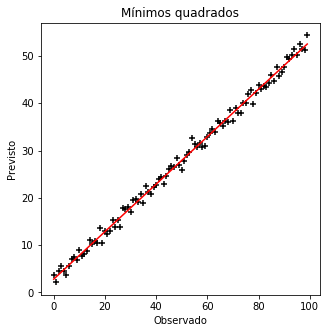

In [27]:
n = 100

# Exercício 4
beta = np.array([3, 0.5])
X = np.stack([np.ones(n), np.arange(n)], axis=1)
y = np.dot(X, beta) + np.random.randn(n)

beta_hat = np.linalg.multi_dot([np.linalg.inv(np.dot(X.T, X)), X.T, y])

# Exercício 5
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(np.arange(n), y, color='k', marker='+')
ax.plot(np.arange(n), np.dot(X, beta_hat), color='red')
ax.set_title(u'Mínimos quadrados')
ax.set_ylabel('Previsto')
ax.set_xlabel('Observado')